In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

#Check the version of TensorFlow you are using
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.15.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!pip install tensorflow-io matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 15.1 MB/s eta 0:00:00


In [ ]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

In [ ]:
import pandas as pd
df = pd.read_hdf('drive/MyDrive/ahkm/data.h5', key='data')

In [ ]:
print(df['hokm'].unique())

['الإظهار الحلقي' 'الإخفاء الحقيقي' 'الإدغام الناقص' 'الإدغام الكامل'
 'الإقلاب']


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'hokm' column
df['hokm'] = label_encoder.fit_transform(df['hokm'])

print(df)

Index(['mp3', 'verse_key', 'example', 'verse_text', 'wav', 'cut_file', 'hokm',
       'features'],
      dtype='object')


In [ ]:
print(df)

                                                    mp3 verse_key     example  \
0     /content/drive/MyDrive/ahkm/Abdul_Basit_Mujaww...       1:7  أَنْعَمْتَ   
1     /content/drive/MyDrive/ahkm/Abdul_Basit_Muratt...       1:7  أَنْعَمْتَ   
2     /content/drive/MyDrive/ahkm/Abdullah_Basfar_64...       1:7  أَنْعَمْتَ   
3     /content/drive/MyDrive/ahkm/Abdurrahmaan_As-Su...       1:7  أَنْعَمْتَ   
4     /content/drive/MyDrive/ahkm/Abu_Bakr_Ash-Shaat...       1:7  أَنْعَمْتَ   
...                                                 ...       ...         ...   
9772  /content/drive/MyDrive/ahkm/aziz_alili_128kbps...     15:70    نَنْهَكَ   
9773  /content/drive/MyDrive/ahkm/khalefa_al_tunaiji...     15:70    نَنْهَكَ   
9774  /content/drive/MyDrive/ahkm/khalefa_al_tunaiji...     15:70    نَنْهَكَ   
9775  /content/drive/MyDrive/ahkm/mahmoud_ali_al_ban...     15:70    نَنْهَكَ   
9776  /content/drive/MyDrive/ahkm/mahmoud_ali_al_ban...     15:70    نَنْهَكَ   

                           

In [ ]:
import os
import shutil
import pandas as pd

input_folder = 'drive/MyDrive/ahkm'

output_folder = 'drive/MyDrive/QuranDataSplitted'

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
  try:
    source_path = row['cut_file']
    label = row['hokm']

    file_name = source_path.split('/')[-1]

    label_folder = os.path.join(output_folder,'houkm'+str(label))
    os.makedirs(label_folder, exist_ok=True)
    destination_path = os.path.join(label_folder, file_name)

    shutil.move(source_path, destination_path)
  except :
    continue
print("Files moved successfully.")

In [ ]:
def load_wav_16k_mono(filename):
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
output_folder = 'drive/MyDrive/QuranDataSplitted2/'
H0 = os.path.join(output_folder, 'houkm0')
H1 = os.path.join(output_folder, 'houkm1')
H2 = os.path.join(output_folder, 'houkm2')
H3 = os.path.join(output_folder, 'houkm3')
H4 = os.path.join(output_folder, 'houkm4')
H0

'drive/MyDrive/QuranDataSplitted2/houkm0'

In [ ]:
h0 = tf.data.Dataset.list_files(H0+'/*.wav')
h1 = tf.data.Dataset.list_files(H1+'/*.wav')
h2 = tf.data.Dataset.list_files(H2+'/*.wav')
h3 = tf.data.Dataset.list_files(H3+'/*.wav')
h4 = tf.data.Dataset.list_files(H4+'/*.wav')

In [ ]:
print(len(h1))

1302


In [ ]:
hokms0 = tf.data.Dataset.zip((h0.take(300), tf.data.Dataset.from_tensor_slices(tf.zeros(300))))
hokms1 = tf.data.Dataset.zip((h1.take(300), tf.data.Dataset.from_tensor_slices(tf.ones(300))))
hokms2 = tf.data.Dataset.zip((h2.take(300), tf.data.Dataset.from_tensor_slices(tf.ones(300)*2)))
hokms3 = tf.data.Dataset.zip((h3.take(300), tf.data.Dataset.from_tensor_slices(tf.ones(300)*3)))
hokms4 = tf.data.Dataset.zip((h4.take(300), tf.data.Dataset.from_tensor_slices(tf.ones(300)*4)))


In [ ]:
data1 = hokms0.concatenate(hokms1)
data2 = hokms2.concatenate(hokms3)
data3 = hokms4

In [ ]:
data = data1.concatenate(data2)
data = data.concatenate(data3)

In [ ]:
len(data)

1500

In [ ]:
data.shuffle(1000).as_numpy_iterator().next()

(b'drive/MyDrive/QuranDataSplitted2/houkm3/Yaser_Salamah_128kbps_016104_\xd8\xb9\xd8\xb0\xd8\xa7\xd8\xa8 \xd8\xa7\xd9\x94\xd9\x84\xd9\x8a\xd9\x85_0.9.wav',
 3.0)

In [ ]:
lengths = []
for file in os.listdir(os.path.join(output_folder, 'houkm0')):
    tensor_wave = load_wav_16k_mono(os.path.join(output_folder, 'houkm0', file))
    lengths.append(len(tensor_wave))

In [ ]:
lengths

In [ ]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=38135>

In [ ]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=3200>

In [ ]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=181333>

In [ ]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([30000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

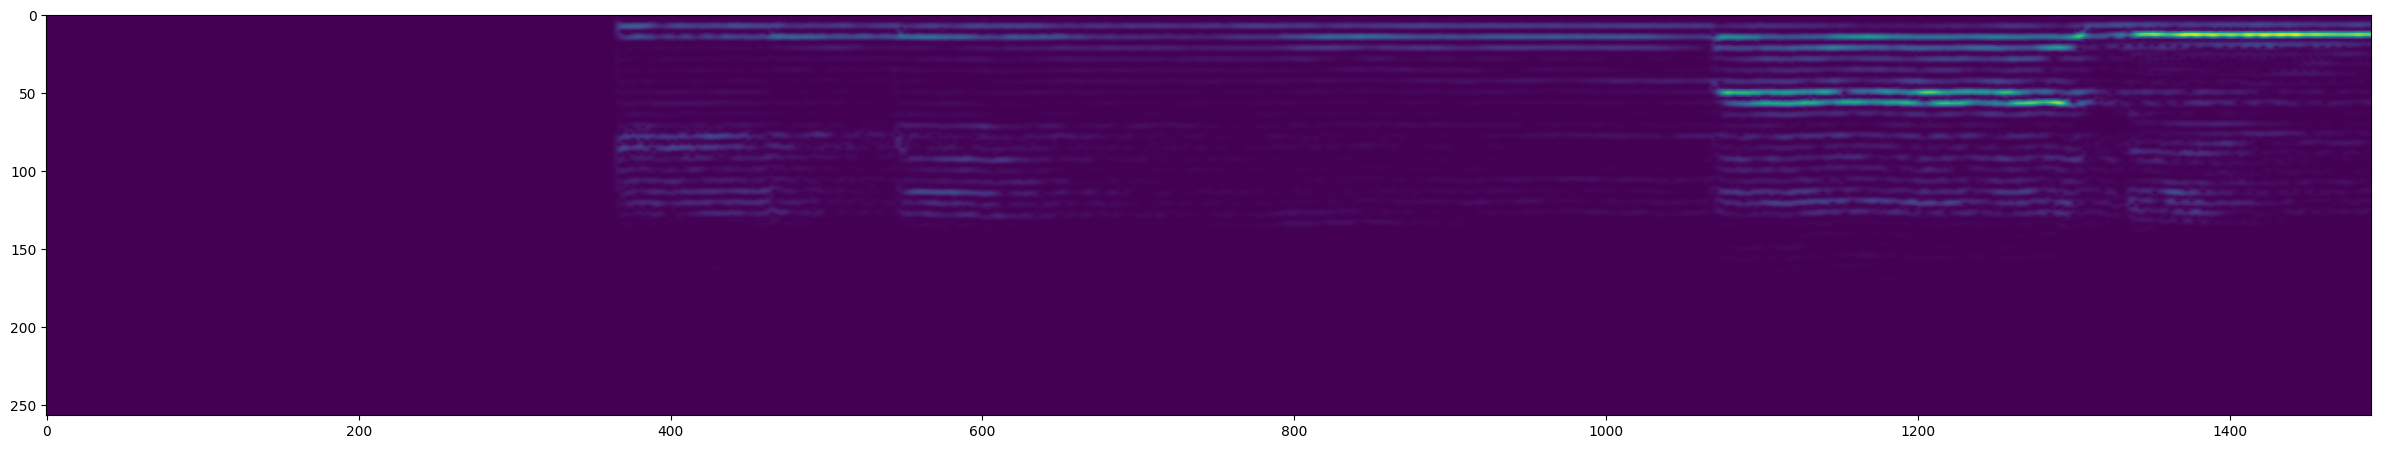

In [ ]:
filepath, label = hokms2.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [ ]:
hokms3.as_numpy_iterator().next()

(b'drive/MyDrive/QuranDataSplitted2/houkm3/Alafasy_64kbps_014017_\xd8\xb9\xd8\xb0\xd8\xa7\xd8\xa8 \xd8\xba\xd9\x84\xd9\x8a\xd8\xb8_0.9.wav',
 3.0)

In [ ]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(4)
data = data.prefetch(4)

In [ ]:
len(data)

375

In [ ]:
train = data.take(int(len(data)*7/10))
test = data.skip(int(len(data)*7/10)).take(int(len(data)*3/10))

In [ ]:
print(labels)

[0. 0. 0. 0.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(1491, 257, 1)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='linear'))

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 8)      80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 744, 127, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 742, 125, 8)       584       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 371, 62, 8)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 184016)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
checkpoint_path = "/drive/MyDrive/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
hist = model.fit(train, epochs=2, validation_data=test, callbacks=[cp_callback])

Epoch 1/2
1077/1077 [==============================] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

NameError: name 'test' is not defined

In [ ]:
yhat = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

NameError: name 'yhat' is not defined